<a href="https://colab.research.google.com/github/mljarman/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



##Part 1

In [65]:
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):
  true_positive_rate=1
  return (true_positive_rate * prob_drunk_prior)/(
        (true_positive_rate * prob_drunk_prior) + (false_positive_rate * 
                                                 (1 - prob_drunk_prior)))

print('after 1 test probability person is drunk:' , 
      prob_drunk_given_positive(.001, .08))

after 1 test probability person is drunk: 0.012357884330202669


In [66]:
print('after 2 tests probability person is drunk:',
     prob_drunk_given_positive(.012, .08))

after 2 tests probability person is drunk: 0.1318101933216169


In [68]:
# after 3 tests
  prob_drunk_given_positive(.13, .08)

0.6513026052104208

In [67]:
# after 4 tests
prob_drunk_given_positive(.65, .08)

0.9587020648967551

##Part 2

In [0]:
from scipy import stats
import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
import pandas as pd


In [71]:
#importing data:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-10-09 22:45:14--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2019-10-09 22:45:20 (127 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [75]:
#loading data:
df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
print(df.shape)
df.head(2)

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?


In [77]:
#changing y's and n's to 1's and 0's and ?'s to NaNs':
df=df.replace({'?' : np.NaN, 'n':0, 'y':1})
df.head(2)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN


In [80]:
df.describe()[:3]

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,423.000000,387.000000,424.000000,424.000000,420.000000,424.000000,421.000000,420.00000,413.000000,428.000000,414.000000,404.000000,410.000000,418.000000,407.000000,331.000000
mean,0.442080,0.503876,0.596698,0.417453,0.504762,0.641509,0.567696,0.57619,0.501211,0.504673,0.362319,0.423267,0.509756,0.593301,0.427518,0.812689
std,0.497222,0.500632,0.491140,0.493721,0.500574,0.480124,0.495985,0.49475,0.500605,0.500563,0.481252,0.494690,0.500516,0.491806,0.495327,0.390752


In [98]:
#I did crime and immigration on the last assignment so going to look at 
# religious groups and south africa.

#make sure NaN values were dropped.
df1 = df.dropna(subset = ['religious-groups' , 'south-africa'])
print(df1['religious-groups'].isnull().sum())
df1['south-africa'].isnull().sum()

0


0

###Frequentist Method:

In [0]:
def confidence_interval(data, confidence=.95):
  n = len(data)
  mean = sum(data)/n
  data = np.array(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n-1)
  return (mean , mean-interval, mean+interval)


In [109]:
# religious groups:
data1 = df1['religious-groups']
print('frequentist confidence interval:\n' , confidence_interval(data1))


frequentist confidence interval:
 (0.6625766871165644, 0.6109787499878302, 0.7141746242452985)


In [0]:
# visualize:
import seaborn as sns
import matplotlib.pyplot as plt

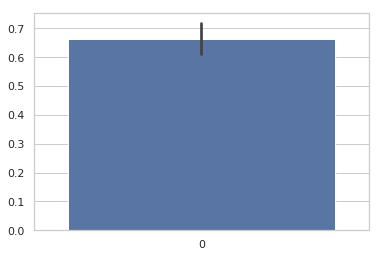

In [110]:
sns.set(style='whitegrid')
ax=sns.barplot(data=data1)

# this is boring.

###Bayesian Method:

In [120]:
bayes = stats.bayes_mvs(data1, alpha=0.95) 
print(bayes)

(Mean(statistic=0.6625766871165644, minmax=(0.6109787499878302, 0.7141746242452985)), Variance(statistic=0.22564531140192598, minmax=(0.19340890203002023, 0.2631637062291542)), Std_dev(statistic=0.4746538591700351, minmax=(0.43978278960189005, 0.5129948403533453)))


ValueError: ignored

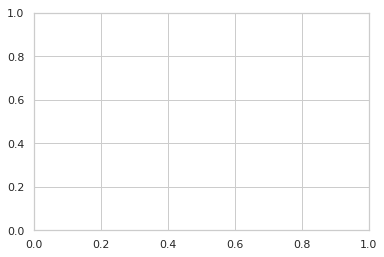

In [121]:
fig, ax =plt.subplots()
ax.boxplot(, notch=True)

##Part 3

Frequentist probability is based on the belief that only repeatable random events have probabilities. They can not predict the probability of an unknown event occurring if it will only occur once. 

An example I found that made sense and that was relevant to lecture today was on elections. Frequentists won't attach a probability of someone winning because they can't reproduce the election over and over to see if the results are the same or different to produce the *probability* of that person winning the election each time. The outcome is unknown and therefore Frequentist statistics won't attach a probability to it.

Bayesian statistics on the other hand will attach probabilities of unknown or uncertain events and then they can use new information to update their prior beliefs or historical probabilities. The new evidence or collected data can make the probability of the unknown event stronger, or in some cases, the new evidence won't outweigh the prior belief if it contradicts in some way. 

Bayesian statistics can look at the probability of other things that are going around the said event and take into account prior occurrences. In the case of the election, they can look into the probability or other related things happening that may impact the outcome of the election. The example given in class was the probability of someone winning the democratic primary and its relation to the probability of winning the general election.

There is an argument that Frequentist statistics are more objective, Bayesian statistics are more subjective but they are also very similar  and can provide similar outcomes. Bayesian centers around prbability and Frequentist centers around maximum likelihood.

I think.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!